# Local Geology of the Princeton Area

IN THE SPACE BELOW, WRITE OUT IN FULL AND THEN SIGN THE HONOR PLEDGE:

“I pledge my honor that I have not violated the honor code during this examination.”

**PRINT NAME**: 

If a fellow student has contributed significantly to this work, please acknowledge them here:

**Peer(s)**:                          

*Contribution:*


By uploading this assignment through Canvas, I sign off on the document below electronically.

----

## Part I: GeoExchange

Princeton needs heating and cooling 24/7/365 on our campus. In the winter, buildings are heated with steam. In the summer, they are cooled with chilled water. But, even on the coldest winter days, we still need to remove heat from the campus to cool lasers, electron microscopes, CT scan machines, computer facilities, and some building cores. And, even on the hottest summer days, we need to deliver heat to the campus for domestic hot water, dish washing, sterilizers, autoclaves, cage washers, and air‐ conditioning reheat for humidity control and comfort. There is a sizable need for simultaneous heating and cooling all year.

Princeton will use big tanks of hot and cold water and big geoexchange borefields for thermal energy storage. The thermal storage tanks hold a few million gallons each; large enough to deliver heating or cooling for several hours. The geoexchange wellfields are large enough to store an entire heating season of energy for the campus! Seasonal energy storage helps to address the mismatch between summer cooling demands and winter heating demands explored in exercises 3a to 3d.

Imagine it’s a hot August day and we’re running heat pumps to meet the campus cooling load. The heat pumps move heat out of the buildings and will have more than enough to satisfy all simultaneous heating needs. What will we do with the excess heat? First, we’ll use it to heat a few million gallons of water in a hot thermal storage tank that can be delivered to campus that night or several days later; whenever heating demand is higher. And what if we still need to remove heat from campus but don’t need it for months for to come? That’s were seasonal storage plays a role.

In [51]:
import pandas as pd
PU_Data = pd.read_excel('Files/Microgrid_PU_Data_8-31-2022.xlsx')

In [52]:
PU_Data

,Timestamp,"Campus Total Cooling Demand, Tons","Outdoor Air Temperature, F","Total Campus Steam Demand, Pounds Per Hour","Total Campus Power Demand, KW","Locational Marginal Price, $/MWH"
0,2020-07-01 00:00:00,6465.366,71.039,36663.306,12531.491,14.123596
1,2020-07-01 01:00:00,6457.861,69.605,36743.513,12325.745,15.380625
2,2020-07-01 02:00:00,6240.119,69.600,36930.052,12195.363,14.876885
3,2020-07-01 03:00:00,6126.111,69.286,36897.495,12146.217,14.004767
4,2020-07-01 04:00:00,5553.196,69.176,36063.303,12201.516,13.325767
...,...,...,...,...,...,...
17513,2022-06-30 20:00:00,6061.833,86.258,37043.694,17035.897,78.367859
17514,2022-06-30 21:00:00,5699.684,83.177,35135.220,17048.291,52.693565
17515,2022-06-30 22:00:00,5700.993,79.999,35613.224,16987.258,60.326447
17516,2022-06-30 23:00:00,5056.392,76.292,35493.236,16242.035,56.912426


In [53]:
PU_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17518 entries, 0 to 17517
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Timestamp                                   17518 non-null  datetime64[ns]
 1   Campus Total Cooling Demand, Tons           17518 non-null  float64       
 2   Outdoor Air Temperature, F                  17518 non-null  float64       
 3   Total Campus Steam Demand, Pounds Per Hour  17518 non-null  float64       
 4   Total Campus Power Demand, KW               17517 non-null  float64       
 5   Locational Marginal Price, $/MWH            17518 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 821.3 KB


- Btu delivered per pound of steam : 950 
- 1 Btu = 3,412  KWH
- Btu removed per Ton-Hour during cooling :  12,000 
- Assuming heating system is 80% efficient. Building heat addition is less than heating energy requirements in the system specifications due to inefficiencies.

In [54]:
PU_Data['Campus building heat addition, MW']=PU_Data['Total Campus Steam Demand, Pounds Per Hour']*950/3412/1000*0.8

In [56]:
PU_Data['Campus heat removal, MW'] = PU_Data['Campus Total Cooling Demand, Tons']*12000/3412/1000

In [57]:
PU_Data

,Timestamp,"Campus Total Cooling Demand, Tons","Outdoor Air Temperature, F","Total Campus Steam Demand, Pounds Per Hour","Total Campus Power Demand, KW","Locational Marginal Price, $/MWH","Campus building heat addition, MW","Campus heat removal, MW"
0,2020-07-01 00:00:00,6465.366,71.039,36663.306,12531.491,14.123596,8.166504,22.738685
1,2020-07-01 01:00:00,6457.861,69.605,36743.513,12325.745,15.380625,8.184370,22.712290
2,2020-07-01 02:00:00,6240.119,69.600,36930.052,12195.363,14.876885,8.225920,21.946491
3,2020-07-01 03:00:00,6126.111,69.286,36897.495,12146.217,14.004767,8.218668,21.545525
4,2020-07-01 04:00:00,5553.196,69.176,36063.303,12201.516,13.325767,8.032858,19.530584
...,...,...,...,...,...,...,...,...
17513,2022-06-30 20:00:00,6061.833,86.258,37043.694,17035.897,78.367859,8.251233,21.319460
17514,2022-06-30 21:00:00,5699.684,83.177,35135.220,17048.291,52.693565,7.826133,20.045782
17515,2022-06-30 22:00:00,5700.993,79.999,35613.224,16987.258,60.326447,7.932606,20.050386
17516,2022-06-30 23:00:00,5056.392,76.292,35493.236,16242.035,56.912426,7.905879,17.783325


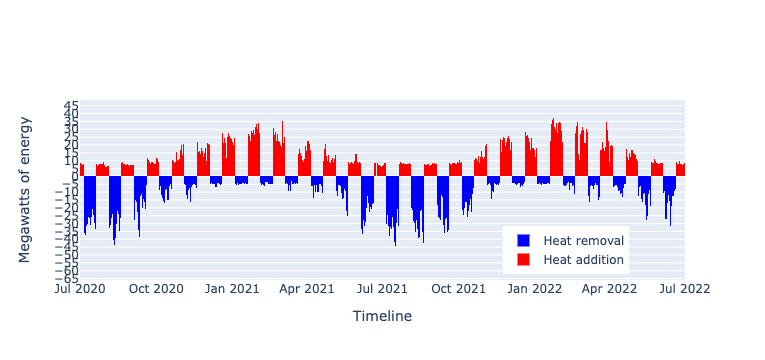

In [94]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Bar(
    name = 'Heat removal',
    x = PU_Data['Timestamp'],
    y = -PU_Data['Campus heat removal, MW'],
    marker_color='blue', marker_line_width=0
   ),
                       go.Bar(
    name = 'Heat addition',
    x = PU_Data['Timestamp'],
    y = PU_Data['Campus building heat addition, MW'],
    marker_color='red', marker_line_width=0
   )
])
 
fig.update_layout(xaxis_title='Timeline',yaxis_title='Megawatts of energy')
fig.update_layout(barmode='group',bargap=0.0,bargroupgap=0.0,
                   legend=dict(yanchor="top",y=0.3,xanchor="left",x=0.7),
                   yaxis=dict(dtick=5))
fig.show()

Annual energy data can inform us about how much energy is needed at peak moments, i.e., what equipment capacity is required. The data can also inform us about what seasonal storage capacity would be helpful.

Exercise #3a
How much energy was produced to heat the campus for a year? Express this in “Pounds of Steam” and convert to Megawatt‐Hours. Assume 950 Btus can be delivered to the conditioned space for every pound of steam.

A: 588,240,373 pounds of steam were produced to heat the campus for an average year. This equates to 163,783 Megawatt-Hours of heat sent from the plant to the campus.

Exercise #3b
If the campus steam system insulation is severely degraded and loses 20% of the heat that’s produced by the plant, how much energy did the campus buildings actually receive?

A: 470,592,299 pounds of steam were delivered to heat the buildings for a year.
This equates to 131,027 Megawatt-Hours of heat supply.

Exercise #3c
How much heat removal is needed to cool the campus for a year? Express this in “Ton‐Hours” and in equivalent Megawatt‐Hours.

A: 34,835,489 ton-hours are required to cool the campus for a year.
This equates to 122,516 Megawatt-Hours of cooling (heat removal).

SEASONAL THERMAL STORAGE ‐‐ GEOEXCHANGE

Typical geoexchange wellfields include hundreds of wells. We’re now drilling over a thousand geoexchange bores on campus, each 850 feet deep and each placed in a grid pattern spaced 20 feet apart. We’re installing a 1.5‐inch‐diameter U‐bend of HDPE plastic tube in each bore and grouting it in place for its entire depth. When we pump warm water from the heat pumps’ condensers down through the HDPE tubes, it will give up its heat through the grout into the surrounding rock. The rock under our campus at that depth is naturally 50‐55 degrees Fahrenheit, so water entering at 90 degrees will give up its heat to the rock and return to the surface at 60‐70 degrees. The earth becomes a heat sink all summer long. Over the course of the summer the rock gradually heats up, acting as a seasonal energy storage reservoir.

We will harvest heat from campus buildings all summer, preserve it for several months underground, and reclaim much of it in winter. Some heat will dissipate through the surrounding rock, but billions of pounds of warm rock will store an ample supply of heat that can be moved back to campus when it’s needed.

The following exercises consider whether an entire season of heat removed from campus could be stored in geoexchange wells below campus. What volume is required, and what kind of temperature change is implied. Each of these calculations is simplified to demonstrate the general concept of campus‐scale seasonal energy storage.

Exercise #5a
Using the campus’s Total Annual Cooling energy requirement calculated in Exercise 3c, convert the amount of heat removed from campus in a year from Ton‐hours to Btus.

A: 34.8 million ton-hours converts to 418 billion Btu heat rejected per year. This is how much energy is removed by the campus cooling system in a year.

Exercise #5b
Assume a rectangular geoexchange wellfield where the geoexchange wells are spaced in a grid pattern 20 feet from center‐to‐center and the geoexchange wells extend down 850 feet in the rock below campus. How many cubic feet of rock are associated with each geoexchange well?

A: The volume of rock associated with each geoexchange well is 340,000 cubic feet.

Exercise #5c
If the average density of rock is 165 pounds per cubic foot and there are 1000 wells in the geoexchange field, how many pounds of rock are associated with the wellfield?

The mass of rock associated with the wellfield is 56.1 billion pounds.

Based on your answers from 5a and 5c, how much heat energy would each pound of rock need to store to hold an entire year of heat removed from the campus?

A: Each pound of rock in the geoexchange array would have to store 7.45 Btus in order to hold the entire amount of heat removed from campus in a year by the cooling system.

Exercise #5e
Assume the specific heat of rock is 0.47 Btu/pound/degree F. How many degrees will the rock in the geoexchange array rise if an entire season of heat is stored? If the wellfield starts at 53 degrees F in the spring, what temperature will it reach by fall?

A: If all cooling energy removed from the campus in a year is stored in the geoexchange field with no heat removal and no losses, then the rock would rise 15.9 degrees. If it began at 53 degrees F in the early spring, it would rise to 68.9 degrees by the fall. During the winter this heat would be removed and the geoexchange field would cool again.

<img src="Images/geoexchange_overall.png" alt="drawing" width="100%"/>

Princeton’s district energy expansion project will include the use of bore holes situated beneath the university’s softball field, new buildings, and other campus spaces. The illustration here captures the essence of the geoexchange component. **Source:** Ted Borer

<img src="Images/borehole_drilling_1.png" alt="drawing" width="100%"/> 
<img src="Images/borehole_drilling_2.png" alt="drawing" width="100%"/>

Princeton is installing over a thousand geoexchange bores on campus. The bores are between 600 and 850 feet deep. 1 ½” diameter HDPE tube is inserted in the wells in a U‐bend to carry water down to the bottom and back to the surface again. As the water is pumped through the wells it will give up heat to the rock (summer) or pick up heat from the rock (winter). **Source:** Whiting-Turner